# Linear Regression - Ames housing

This project uses data from 'Ames'(Iowa) to determine the pricing of houses based on various factors.The data is first split into training and testing set and then cleaned wherever required. We then find co-relation of various columns to find the most prominent columns based on which we predict the price. 
Linear regression model is chosen to fit over the data and then the difference between the 'actual' and 'predicted' price is calculated to find out the error. 
Several iterations using various combinations of the 'feature' columns will lead to different %errors. Ultimately the combination of columns with the least error will be the ideal set.

In [3]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

#Reading the data into a dataframe and splitting it into the training and test set.

data=pd.read_csv('AmesHousing.txt',delimiter='\t')
train=data[:1460]
test=data[1460:]

In [545]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
# Printing the information of the dataframe.

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [400]:
# 'describe()' will give the basic stats of the dataframe.

data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,predict
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.223823,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896747,...,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068,180796.060068
std,845.96247,1.887308e+08,42.638025,21.321523,7880.017759,1.411026,1.111537,30.245361,20.860286,178.407983,...,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,69.220000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,755000.000000


In [518]:
# Finding co-relation among the columns. This will help us determine which columns can be most influencing ones.

print(train[['Garage Area','Gr Liv Area','Overall Cond','SalePrice']].corr())

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000


In [522]:
# As only columns based on numerical values can be continuous in nature, we are selecting only columns having numeric values.

num_cols=data.select_dtypes(include=['int64','int','float','float64'])
num_cols.columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice', 'predict'],
      dtype='object')

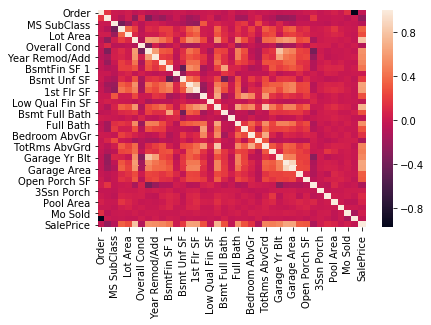

In [521]:
# Finding co-relation using heatmaps.

cor=data[['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice']].corr()
sns.heatmap(cor)

As there are many columns it is visually difficult to interpret the co-relation. Hence we must set a refine the number of columns to be chosen. We will take up this part further.

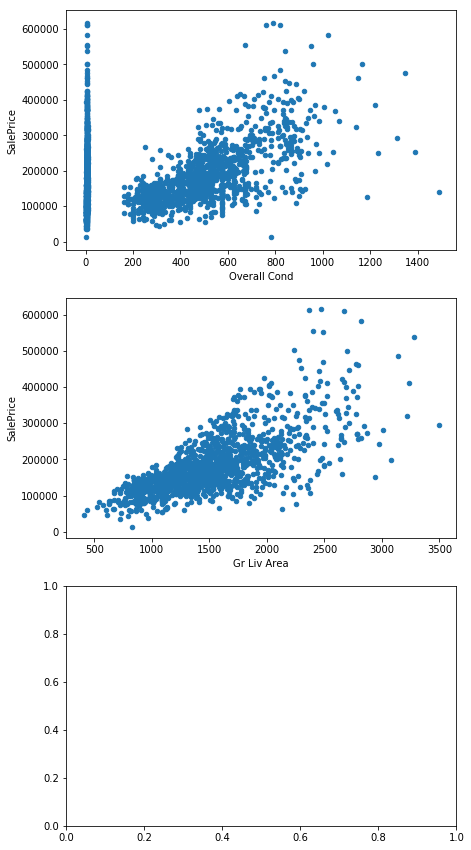

In [519]:
# Plotting scatter plot for a few feature columns to visally find their dependence on the 'Sale price'

fig=plt.figure(figsize=(7,15))

ax1=fig.add_subplot(3,1,1)
ax2=fig.add_subplot(3,1,2)
ax3=fig.add_subplot(3,1,3)

fig1=train.plot(x='Garage Area',y='SalePrice',ax=ax1,kind='scatter')
fig2=train.plot(x='Gr Liv Area',y='SalePrice',ax=ax2,kind='scatter')
fig3=train.plot(x='Overall Cond',y='SalePrice',ax=ax1,kind='scatter')


plt.show()

# Univariate case

In univariate case the output is dependent on only one column. Here it is the 'Gr Liv Area'.

In [15]:
# Machine learning implementation. The Linear Regression model is imported and then initialised. 
# The model is then fit over the training set.

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train[['Gr Liv Area']],train['SalePrice'])

# 'a0' & 'a1' are the co-effecients. 'a0' is the y-intercept and 'a1' is the co-effecient of x-values.

a0=lr.intercept_
a1=lr.coef_
print(a0)
print(a1)

5366.821710056014
[116.86624683]


In [18]:
# Prediction the value of the target variable.'predict' function is being used.

train_predictions=lr.predict(train[['Gr Liv Area']])
test_predictions=lr.predict(test[['Gr Liv Area']])

# Computing the mean squared error. 

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(train_predictions,train['SalePrice'])
test_mse = mean_squared_error(test_predictions,test['SalePrice'])

print(train_predictions)
print(test_predictions)

print(train_mse)
print(test_mse)

[198897.32645574 110078.97886714 160682.06374328 ... 221803.11083385
 242722.16901591 269835.13827979]
[232905.40428243 214089.93854327 272990.52694413 ... 118727.08113235
 167694.0385529  239099.31536427]
3139849724.905375
3259068472.1879897


In [523]:
# Computing the 'root mean square' error.

train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

print("Training RMSE")
print(train_rmse)
print("Testing RMSE")
print(test_rmse)

Training RMSE
56034.3620014128
Testing RMSE
57088.25161263909


The above values are the error for training and testing data set respectively for a univariate case. We need to find out if they can be reduced to a further extent.

# Multivariate case

In multivariate case several columns are considered for predicting output.

In [ ]:
cols=['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice']

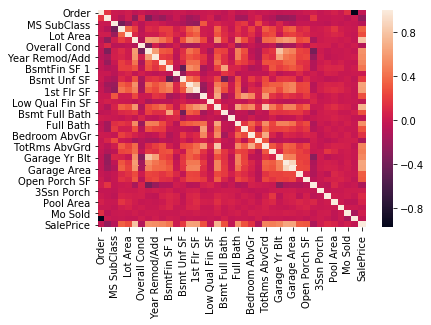

In [546]:
# Finding co-realtion. 

corr=data[['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition', 'SalePrice']].corr()
sns.heatmap(corr)

It is visually difficult to find the exact co-relation as there are several columns.

In [551]:
# Selecting only columns which are strongly co-related. The minimum threshold is set at '0.55'

all_corr=data.corr()['SalePrice'].abs()
strong_corr=all_corr[all_corr >= 0.55]

In [550]:
print(strong_corr)

Overall Qual     0.799262
Year Built       0.558426
Total Bsmt SF    0.632105
1st Flr SF       0.621676
Gr Liv Area      0.706780
Garage Cars      0.647862
Garage Area      0.640385
SalePrice        1.000000
predict          1.000000
Name: SalePrice, dtype: float64


In [552]:
multi_cols=['Overall Qual','Year Built','Total Bsmt SF','1st Flr SF','Gr Liv Area','Garage Cars','Garage Area','SalePrice']

The above columns are best suited for the multivariate case.

In [553]:
multi_data_train=data[multi_cols][:1460]
multi_data_test=data[multi_cols][1460:]

In [556]:
multi_data_train.isnull().sum()

Overall Qual     0
Year Built       0
Total Bsmt SF    0
1st Flr SF       0
Gr Liv Area      0
Garage Cars      0
Garage Area      0
SalePrice        0
dtype: int64

In [557]:
# Data cleansing. Filling null values with the 'mean' value of the respective column.

data['Lot Frontage'].fillna(69.22,inplace=True)
data['Mas Vnr Area'].fillna(101.89,inplace=True)
data['BsmtFin SF 1'].fillna(442.62,inplace=True)
data['Bsmt Unf SF'].fillna(559.26,inplace=True)
data['Total Bsmt SF'].fillna(1051.61,inplace=True)
data['Bsmt Full Bath'].fillna(0.43,inplace=True)
data['Bsmt Half Bath'].fillna(0.06,inplace=True)
data['Garage Yr Blt'].fillna(1978.13,inplace=True)
data['Garage Cars'].fillna(1.76,inplace=True)
data['Garage Area'].fillna(472.81,inplace=True)


In [558]:
# Finding the mean of each column.

data[cols].mean()

Lot Frontage           69.223823
Lot Area            10147.921843
Overall Qual            6.094881
Overall Cond            5.563140
Year Built           1971.356314
Year Remod/Add       1984.266553
Mas Vnr Area          101.896747
BsmtFin SF 1          442.629563
BsmtFin SF 2           49.722430
Bsmt Unf SF           559.262546
Total Bsmt SF        1051.614543
Low Qual Fin SF         4.676792
Gr Liv Area          1499.690444
Bsmt Full Bath          0.431352
Bsmt Half Bath          0.061133
Full Bath               1.566553
Half Bath               0.379522
Bedroom AbvGr           2.854266
Kitchen AbvGr           1.044369
TotRms AbvGrd           6.443003
Fireplaces              0.599317
Garage Yr Blt        1978.132311
Garage Cars             1.766812
Wood Deck SF           93.751877
Open Porch SF          47.533447
Enclosed Porch         23.011604
3Ssn Porch              2.592491
Screen Porch           16.002048
Pool Area               2.243345
Misc Val               50.635154
Mo Sold   

In [560]:
# Model training for the training set.

lr.fit(multi_data_train[multi_cols],multi_data_train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [561]:
# Predicting values. We are appending a new column named 'Predicted_price' and the output is stored here.

multi_data_train['Predicted_price']=lr.predict(multi_data_train[multi_cols])

In [564]:
# Running the model over the tesing set.

lr.fit(multi_data_test[multi_cols],multi_data_test['SalePrice'])
multi_data_test['Predicted_price']=lr.predict(multi_data_test[multi_cols])

In [565]:
# Calculating mean square error between the 'actual' and the 'predicted' price.

m_error=mean_squared_error(multi_data_test['Predicted_price'],multi_data_test['SalePrice'])

In [567]:
# Computing

np.sqrt(m_error)

1.0708763660032525e-10

Here it is observed that the error values are minimised to a vary small value. Hence it is good to opt for a multi variate case and perform several iterations over time to have the least variance between the actual price and predicted price.

In [571]:
data[['SalePrice','predict']]

,SalePrice,predict
0,215000,215000.0
1,105000,105000.0
2,172000,172000.0
3,244000,244000.0
4,189900,189900.0
5,195500,195500.0
6,213500,213500.0
7,191500,191500.0
8,236500,236500.0
9,189000,189000.0
